#🧠 Recurrent Neural Network (RNN)

🔍 What is an RNN?


A Recurrent Neural Network (RNN) is a type of neural network where connections between nodes form a directed graph along a sequence, allowing it to maintain a memory of previous inputs. It’s widely used in sequential data like:

>Time-series forecasting

>Natural language processing

>Stock prediction

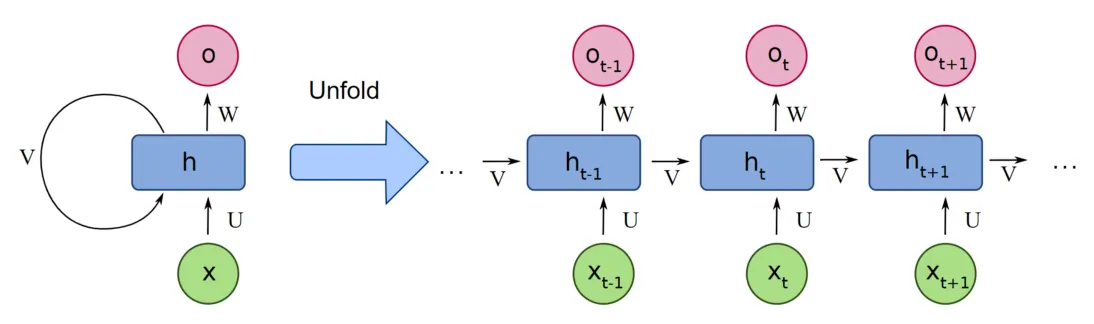

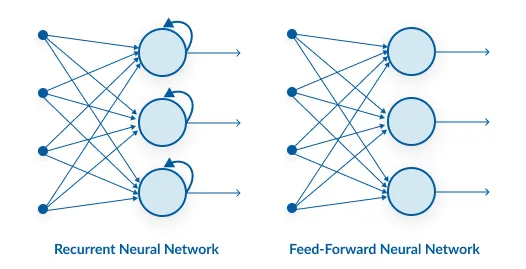

#📐 Core Equation of RNN
Given:

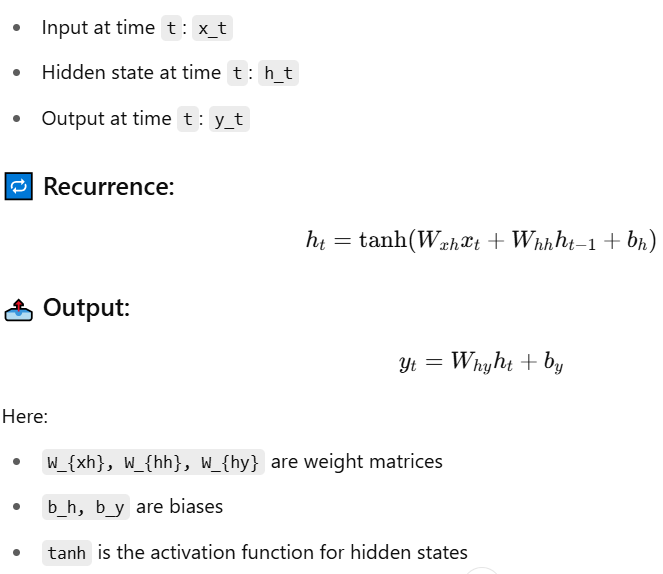

#🧠 RNN with a Synthetic Text Dataset
We'll create a toy dataset of short movie reviews with positive and negative labels, then build and train a Recurrent Neural Network using Keras.

#📝 Step 1: Define Synthetic Dataset

In [ ]:
# synthetic_dataset.py

texts = [
    "I love this movie", "This film was fantastic", "Amazing storyline and acting",
    "Great direction", "I really enjoyed the movie", "Best movie ever",
    "I hated the movie", "Worst acting", "Terrible plot", "I dislike this film",
    "Not good at all", "Boring and slow movie"
]

labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]  # 1 = Positive, 0 = Negative


#🧹 Step 2: Preprocessing with Tokenization and Padding

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set vocab size and tokenizer
vocab_size = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences for equal length
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Convert labels to numpy array
labels = np.array(labels)


#🧠 Step 3: Define and Train a Simple RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Build RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_len),
    SimpleRNN(32, activation='tanh'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, labels, epochs=30, verbose=1)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6939
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6667 - loss: 0.6869
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6667 - loss: 0.6800
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6728
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.6655
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8333 - loss: 0.6578
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8333 - loss: 0.6497
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8333 - loss: 0.6411
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8333 - loss: 0.6320
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8333 - loss: 0.6222
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8333 - loss: 0.6117
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8333 - loss: 0.6005
Epoch 13/30
1/

#✅ Step 4: Evaluate on a New Example

In [ ]:
def predict_sentiment(sentence):
    seq = tokenizer.texts_to_sequences([sentence])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(padded)[0][0]
    return "Positive" if pred > 0.5 else "Negative"

# Test
print(predict_sentiment("Amazing movie"))
print(predict_sentiment("Worst movie ever"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Negative


#🧾 What Learn from This

| Concept                       | Benefit                                      |
| ----------------------------- | -------------------------------------------- |
| Tokenizer                     | Understand how text is turned into sequences |
| Padding                       | Learn why fixed input size is necessary      |
| Embedding                     | See how words become vectors                 |
| SimpleRNN                     | Visualize how memory in sequences works      |
| Sigmoid + Binary Crossentropy | Binary classification logic                  |
| Inference                     | Try their own sentences in prediction        |


#Two Issues of Standard RNNs

RNNs have had to overcome two key challenges, but to comprehend them, one must first grasp what a gradient is.

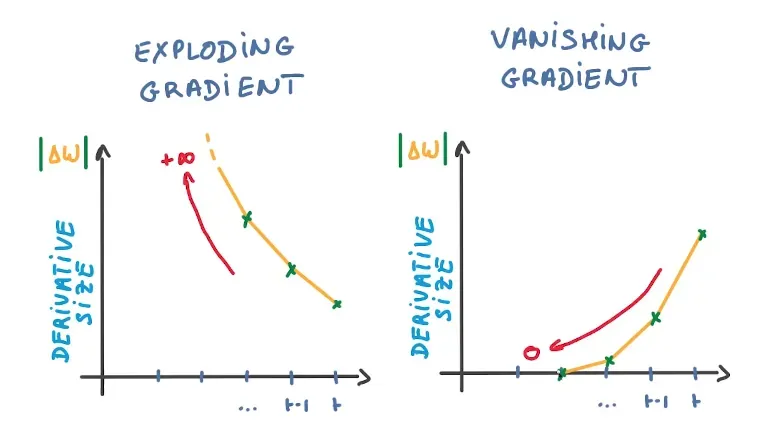

About its inputs, a gradient is a partial derivative. If you’re unsure what that implies, consider this: a gradient quantifies how much the output of a function varies when the inputs are changed slightly.


A function’s slope is also known as its gradient. The steeper the slope, the faster a model can learn, and the higher the gradient. The model, on the other hand, will stop learning if the slope is zero. A gradient is used to measure the change in all weights about the change in error.


#Exploding Gradients:

Exploding gradients occur when the algorithm gives the weights an absurdly high priority for no apparent reason. Fortunately, truncating or squashing the gradients is a simple solution to this problem.


#Vanishing Gradients:

Vanishing gradients occur when the gradient values are too small, causing the model to stop learning or take far too long. This was a big issue in the 1990s, and it was far more difficult to address than the exploding gradients. Fortunately, Sepp Hochreiter and Juergen Schmidhuber’s LSTM concept solved the problem.

#What Are the Different Variations of RNN?
Researchers have introduced new, advanced RNN architectures to overcome issues like vanishing and exploding gradient descent that hinder learning in long sequences.

#Long Short-Term Memory (LSTM):

A popular choice for complex tasks. LSTM networks introduce gates, i.e., input gate, output gate, and forget gate, that control the flow of information within the network, allowing them to learn long-term dependencies more effectively than vanilla RNNs.

#Gated Recurrent Unit (GRU):

Similar to LSTMs, GRUs use gates to manage information flow. However, they have a simpler architecture, making them faster to train while maintaining good performance. This makes them a good balance between complexity and efficiency.